In [13]:
#check the gpu
!nvidia-smi

Sat Jul 17 05:01:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    31W /  70W |   4826MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating Helper Functions

It is good idea to put them into github and import them when you need

In [14]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-17 05:01:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-17 05:01:39 (104 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [15]:
#import helper functions 
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir


##Get the data

use the pre trained models within tf.keras.applications and apply them to our problems.

In [16]:
#get traning data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-17 05:01:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   225MB/s    in 0.7s    

2021-07-17 05:01:40 (225 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [17]:
#check out dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [18]:
#create training and test directories
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [19]:
import tensorflow as tf

In [20]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent =tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [21]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [22]:
#checkout clssnames
train_data_10_percent.class_names


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [23]:
#see a example of batch
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[2.41872452e+02 2.36801025e+02 2.28158157e+02]
   [2.35188766e+02 2.37974487e+02 2.26903061e+02]
   [2.17290817e+02 2.30933670e+02 2.25219391e+02]
   ...
   [2.06142883e+02 5.71406722e-01 1.23571424e+01]
   [2.06357147e+02 3.57142806e-01 1.23571424e+01]
   [2.06357147e+02 3.57142806e-01 1.23571424e+01]]

  [[2.40591843e+02 2.39357147e+02 2.29760193e+02]
   [2.29709183e+02 2.35423462e+02 2.25219376e+02]
   [2.10341827e+02 2.22826523e+02 2.19714279e+02]
   ...
   [2.04000000e+02 0.00000000e+00 1.10000000e+01]
   [2.05000000e+02 0.00000000e+00 1.10000000e+01]
   [2.05000000e+02 0.00000000e+00 1.10000000e+01]]

  [[2.37010193e+02 2.40714279e+02 2.33790817e+02]
   [2.24586731e+02 2.31872437e+02 2.25270401e+02]
   [2.07260193e+02 2.19688766e+02 2.18331635e+02]
   ...
   [2.04357147e+02 7.85714149e-01 1.27857141e+01]
   [2.04357147e+02 7.85714149e-01 1.27857141e+01]
   [2.04357147e+02 7.85714149e-01 1.27857141e+01]]

  ...

  [[2.34000000e+02 2.01000000e+02 1.58000000e+02]
   [2

##Create a transfer learning model using fucntional API

In [24]:
#create base model with tf.keras.applications
base_model =tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model
base_model.trainbale=False

#create inputs into model
inputs =tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# #if using resnet50 you will need to normalzied inputs
# x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#pass the inputs into base model
x=base_model(inputs)
print(f"Shape after passing inputs though base model :{x.shape}")

#avarage pool the outputs of the model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_poolong_layer")(x)
print(f"Shspe after GlobalAvaragePoolong :{x.shape}")

#create the output activation layer
outputs =tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#combine inputs outputs 
model_0 =tf.keras.Model(inputs,outputs)

#compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent =model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 *len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name ="10_percent_feature_extraction"
                                                   )])


Shape after passing inputs though base model :(None, 7, 7, 1280)
Shspe after GlobalAvaragePoolong :(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210717-050144
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 20s 542ms/step - loss: 1.3441 - accuracy: 0.5827 - val_loss: 0.9583 - val_accuracy: 0.7286
Epoch 2/5
24/24 [==============================] - 11s 428ms/step - loss: 0.2713 - accuracy: 0.9240 - val_loss: 1.1493 - val_accuracy: 0.6826
Epoch 3/5
24/24 [==============================] - 11s 430ms/step - loss: 0.1256 - accuracy: 0.9720 - val_loss: 1.0165 - val_accuracy: 0.7336
Epoch 4/5
24/24 [==============================] - 11s 430ms/step - loss: 0.0882 - accuracy: 0.9760 - val_loss: 0.9699 - val_accuracy: 0.7632
Epoch 5/5
24/24 [==============================] - 11s 430ms/step - loss: 0.0760 - accuracy: 0.9827 - val_loss: 1.1560 - val_accuracy: 0.7270


In [25]:
#evalaut the model
model_0.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 1.2305 - accuracy: 0.7172


[1.2305002212524414, 0.717199981212616]

In [27]:
#check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)


0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [28]:
#summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, None, None, 3 7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_1[0][0]            
_____________________________________________________________________________________

In [29]:
#whole model
model_0.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avarage_poolong_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


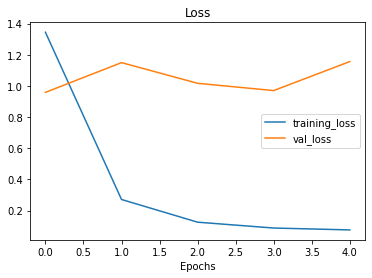

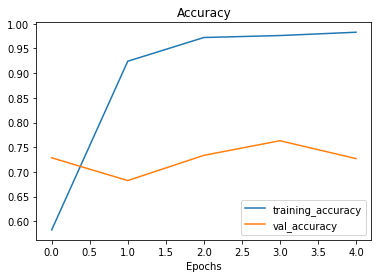

In [30]:
#check out the loss curver
plot_loss_curves(history_10_percent)

##Getting a Feature Vector from Trained 